In [1]:
from helpers.readSetFiles import readSetFiles,validateParameters,readNumberSetFiles
from graph import plotEpochsError,plotGraphEj1
from helpers.configHelper import ConfigHelper
from neuralNetworkManager import NeuralNetworkManager
from activationFunctions.stepActivationFunction import StepActivationFunction
from activationFunctions.linealActivationFunction import LinealActivationFunction
from activationFunctions.hyperbolicTangentActivationFunction import HyperbolicTangentActivationFunction
from activationFunctions.sigmoidalActivationFunction import SigmoidalActivationFunction
from app import normalize
from output import Output

# Ej1 - Perceptron Simple Escalon

##### Funcion logica ’Y’ con entradas

In [ ]:
configPath="./config/Ej1/configEj1.json"
configHelper = ConfigHelper(configPath)
(architecture,activationFunction,beta,learningRate,maxIterations,maxToleranceExponent) = configHelper.getProperties()
(trainingSet,resultsSet)=readSetFiles("./datasets/Ej1/training_set_ej_1.txt","./datasets/Ej1/result_set_ej_1_and.txt")

neuralNetworkManager = NeuralNetworkManager(architecture,activationFunction,learningRate,maxIterations,maxToleranceExponent)
(epochs,executionTime,exception) = neuralNetworkManager.start(trainingSet,resultsSet)
#Plot error graph
plotEpochsError(epochs)
#Plot points and division graph
isXOR = False
plotGraphEj1(trainingSet,isXOR,epochs)
#Print output
print("FINISH-------------------------------------------------------------------------------------------")
output = Output(configHelper,epochs[-1].error,epochs[-1].iterationNumber,executionTime)
output.printOutput()

##### Funcion logica ’O exclusivo’ con entradas

In [ ]:
configPath="./config/Ej1/configEj1.json"
configHelper = ConfigHelper(configPath)
(architecture,activationFunction,beta,learningRate,maxIterations,maxToleranceExponent) = configHelper.getProperties()
(trainingSet,resultsSet)=readSetFiles("./datasets/Ej1/training_set_ej_1.txt","./datasets/Ej1/result_set_ej_1_xor.txt")

neuralNetworkManager = NeuralNetworkManager(architecture,activationFunction,learningRate,maxIterations,maxToleranceExponent)
(epochs,executionTime,exception) = neuralNetworkManager.start(trainingSet,resultsSet)
#Plot error graph
plotEpochsError(epochs)
#Plot points and division graph
isXOR = True
plotGraphEj1(trainingSet,isXOR,epochs)
#Print output
print("FINISH-------------------------------------------------------------------------------------------")
output = Output(configHelper,epochs[-1].error,epochs[-1].iterationNumber,executionTime)
output.printOutput()

# Ej2 Perceptron Simple lineal/no lineal


In [ ]:
(architecture,activationFunction,beta,learningRate,maxIterations,maxToleranceExponent) = ConfigHelper("./config/Ej2/configEj2.json").getProperties()
(trainingSet,resultsSet)=readSetFiles("./datasets/Ej2/training_set_ej_2.txt","./datasets/Ej2/result_set_ej_2.txt")
resultsSet=normalize(resultsSet,-1,1)
activationFunctions=[LinealActivationFunction,HyperbolicTangentActivationFunction,SigmoidalActivationFunction]
for aF in activationFunctions:
    neuralNetworkManager = NeuralNetworkManager(architecture,aF.getType(beta),learningRate,maxIterations,maxToleranceExponent)
    (epochs,executionTime,exception) = neuralNetworkManager.start(trainingSet,resultsSet)
    plotEpochsError(epochs)

# Ej3 Perceptron Multicapa

##### 3.1 Funciones logicas ’Y’ y ’O exclusivo’ con entradas

##### ’Y’

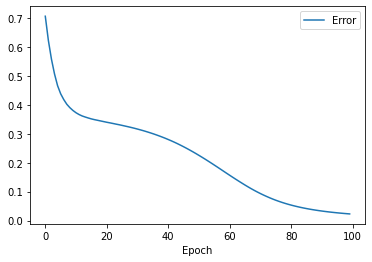

<Figure size 432x288 with 0 Axes>

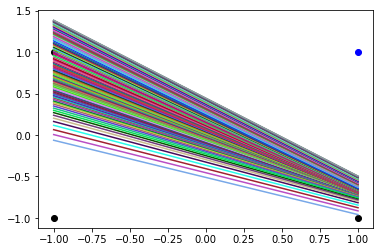

FINISH-------------------------------------------------------------------------------------------
OUTPUT :
        - Configuration paramaters :
            	-Architecture : [2, 3, 3, 4, 1]
		-Activation function :TANH
		-Beta : 0.45
		-Learning rate : 0.1 
		-Max iterations : 100
		-Error bound : 1e^-12
        - Error : 0.02293211520928886

        - Epoch : 99

        - Execution time : 0.306885300000431 sec


In [3]:
configPath="./config/Ej3/configEj3.json"
configHelper = ConfigHelper(configPath)
(architecture,activationFunction,beta,learningRate,maxIterations,maxToleranceExponent) = configHelper.getProperties()
(trainingSet,resultsSet)=readSetFiles("./datasets/Ej1/training_set_ej_1.txt","./datasets/Ej1/result_set_ej_1_and.txt")

neuralNetworkManager = NeuralNetworkManager(architecture,activationFunction,learningRate,maxIterations,maxToleranceExponent)
(epochs,executionTime,exception) = neuralNetworkManager.start(trainingSet,resultsSet)
#Plot error graph
plotEpochsError(epochs)
#Plot points and division graph
isXOR = False
plotGraphEj1(trainingSet,isXOR,epochs)
#Print output
print("FINISH-------------------------------------------------------------------------------------------")
output = Output(configHelper,epochs[-1].error,epochs[-1].iterationNumber,executionTime)
output.printOutput()

##### ’O exclusivo’

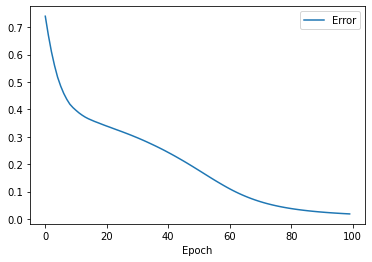

<Figure size 432x288 with 0 Axes>

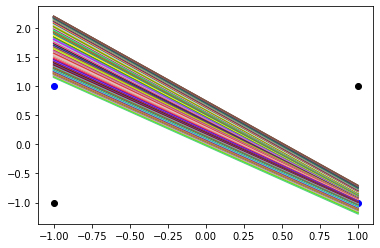

FINISH-------------------------------------------------------------------------------------------
OUTPUT :
        - Configuration paramaters :
            	-Architecture : [2, 3, 3, 4, 1]
		-Activation function :TANH
		-Beta : 0.45
		-Learning rate : 0.1 
		-Max iterations : 100
		-Error bound : 1e^-12
        - Error : 0.018604942228299268

        - Epoch : 99

        - Execution time : 0.31866200000513345 sec


In [2]:
configPath="./config/Ej3/configEj3.json"
configHelper = ConfigHelper(configPath)
(architecture,activationFunction,beta,learningRate,maxIterations,maxToleranceExponent) = configHelper.getProperties()
(trainingSet,resultsSet)=readSetFiles("./datasets/Ej1/training_set_ej_1.txt","./datasets/Ej1/result_set_ej_1_and.txt")

neuralNetworkManager = NeuralNetworkManager(architecture,activationFunction,learningRate,maxIterations,maxToleranceExponent)
(epochs,executionTime,exception) = neuralNetworkManager.start(trainingSet,resultsSet)
#Plot error graph
plotEpochsError(epochs)
#Plot points and division graph
isXOR = True
plotGraphEj1(trainingSet,isXOR,epochs)
#Print output
print("FINISH-------------------------------------------------------------------------------------------")
output = Output(configHelper,epochs[-1].error,epochs[-1].iterationNumber,executionTime)
output.printOutput()

##### 3.2 Indicar paridad para numeros del 0 al 9

In [ ]:
configPath="./config/configEj3.json"
configHelper = ConfigHelper(configPath)
(architecture,activationFunction,beta,learningRate,maxIterations,maxToleranceExponent) = configHelper.getProperties()
(trainingSet,resultsSet)=readNumberSetFiles("./datasets/Ej3/training_set_ej_3.txt","./datasets/Ej3/result_set_ej_3_2.txt")
print(trainingSet)
print(resultsSet)
neuralNetworkManager = NeuralNetworkManager(architecture,activationFunction,learningRate,maxIterations,maxToleranceExponent)
(epochs,executionTime,exception) = neuralNetworkManager.start(trainingSet,resultsSet)
print("FINISH-------------------------------------------------------------------------------------------")
print(epochs)
output = Output(configHelper,epochs[-1].error,epochs[-1].iterationNumber,executionTime)
output.printOutput()

##### 3.3 Indicar que numero es, para numeros del 0 al 9

In [ ]:
configPath="./config/configEj3.json"
configHelper = ConfigHelper(configPath)
(architecture,activationFunction,beta,learningRate,maxIterations,maxToleranceExponent) = configHelper.getProperties()
(trainingSet,resultsSet)=readNumberSetFiles("./datasets/Ej3/training_set_ej_3.txt","./datasets/Ej3/result_set_ej_3_2.txt")
print(trainingSet)
print(resultsSet)
neuralNetworkManager = NeuralNetworkManager(architecture,activationFunction,learningRate,maxIterations,maxToleranceExponent)
(epochs,executionTime,exception) = neuralNetworkManager.start(trainingSet,resultsSet)
print("FINISH-------------------------------------------------------------------------------------------")
print(epochs)
output = Output(configHelper,epochs[-1].error,epochs[-1].iterationNumber,executionTime)
output.printOutput()